<a href="https://colab.research.google.com/github/Aboelsaood23/Aboelsaood23/blob/main/specilaization_2_Course_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#python basics with numpy
import math
import numpy as np


def basic_sigmoid(x):
  s =1/(1+math.exp(-x))
  return s

basic_sigmoid(3)
#we rarely use the "math" library in deep learning because the inputs of the functions are real numbers. In deep learning we mostly use matrices and vectors.#we rarely use the "math" library in deep learning because the inputs of the functions are real numbers. In deep learning we mostly use matrices and vectors.
x = np.array([1, 2, 3])
print(np.exp(x))


print("type of x",type(x))
new_x =np.array(x)
print("exponential of new x",np.exp(new_x))

def sigmoid(x):
  s =1/(1+np.exp(-x))
  return s

print("sigmoid of new x",sigmoid(new_x))

#sigmoid derivative(x) =sigmoid(x)(1-sigmoid(x))
x = np.array([1, 2, 3])
def derivative_sigmoid(x):
  s =sigmoid(x)
  ds= s*(1-s)
  return s

print("sigmoid derivative of new x",derivative_sigmoid(x))

# Two common numpy functions used in deep learning are np.shape and np.reshape().
#1 X.shape is used to get the shape (dimension) of a matrix/vector X.
#2 X.reshape(...) is used to reshape X into some other dimension.
#Implement image2vector() that takes an input of shape (length, height, 3) and returns a vector of shape (length*height*3, 1).
def image2vector(image):
  v =image.reshape(image.shape[0]*image.shape[1]*image.shape[2],1)
  return v
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])
print("\nshape of original image",image.shape)
print("shape of reshaped image",image2vector(image).shape)
print("new reshaped image",image2vector(image))

#Normalizing rows
#Another common technique we use in Machine Learning and Deep Learning is to normalize our data
#It often leads to a better performance because gradient descent converges faster after normalization
# by normalization we mean changing x to x/||x|| (dividing each row vector of x by its norm).

#x_norm takes the norm of each row of x. So x_norm has the same number of rows but only 1 column
#So how did it work when you divided x by x_norm? This is called broadcasting

def normalizeRows(x):
  x_norm =np.linalg.norm(x,axis = 1,keepdims =True)#axis=1 means that the norm is calculated along the second axis,So, the norm is calculated for each row of the array.
  #keepdims=True: This parameter, when set to True, ensures that the dimensions of the output are the same as the input
  x =x/x_norm
  return x

x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
print("normalizeRows(x) = " + str(normalizeRows(x)))
print("shape befor normalizerwos",x.shape)
print("normalizeRows shape " , normalizeRows(x).shape)

# GRADED FUNCTION: softmax

def softmax(x):
  x_exp = np.exp(x)
  x_sum = np.sum(x_exp,axis=1,keepdims=True)
  s = x_exp/x_sum
  return s

x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
print("softmax(x) = " + str(softmax(x)))


[ 2.71828183  7.3890561  20.08553692]
type of x <class 'numpy.ndarray'>
exponential of new x [ 2.71828183  7.3890561  20.08553692]
sigmoid of new x [0.73105858 0.88079708 0.95257413]
sigmoid derivative of new x [0.73105858 0.88079708 0.95257413]

shape of original image (3, 3, 2)
shape of reshaped image (18, 1)
new reshaped image [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]
normalizeRows(x) = [[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]
shape befor normalizerwos (2, 3)
normalizeRows shape  (2, 3)
softmax(x) = [[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


In [2]:
import time
x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]
tic =time.process_time()
dot =0
for i in range(len(x1)):
  dot+=x1[i]*x2[i] #dot product multiply eacj elemnent by crossponding eelement, then do summation for each results
toc =time.process_time()
print("dot = "+str(dot)+"\n computation time= " + str(1000*(toc - tic)) + "ms")


### CLASSIC OUTER PRODUCT IMPLEMENTATION ###
tic = time.process_time()
outer = np.zeros((len(x1),len(x2))) # we create a len(x1)*len(x2) matrix with only zeros
for i in range(len(x1)):
    for j in range(len(x2)):
        outer[i,j] = x1[i]*x2[j] # multiply each element on x1 to all elements of x2, then move to next element and so on, so final shape will be (15,15)
toc = time.process_time()
print ("outer = " + str(outer) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### CLASSIC ELEMENTWISE IMPLEMENTATION ###
tic = time.process_time()
mul = np.zeros(len(x1))
for i in range(len(x1)):
    mul[i] = x1[i]*x2[i] # multiply each element on crossponding element of x2 only so final shape(15,)
toc = time.process_time()
print ("elementwise multiplication = " + str(mul) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")


### CLASSIC GENERAL DOT PRODUCT IMPLEMENTATION ###
W = np.random.rand(3,len(x1)) # Random 3*len(x1) numpy array
print("\ngeneral dot product")
print("values of w",W,"shape of w",W.shape)
tic = time.process_time()
gdot = np.zeros(W.shape[0])
for i in range(W.shape[0]):
    for j in range(len(x1)):
        gdot[i] += W[i,j]*x1[j] #here w is on shape(3,15), and x on shape(15,1), so final result on shape(3,1)
toc = time.process_time()
print ("gdot = " + str(gdot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

###let's do all operations with victoriation
print("\n\n\n\n\nvictorization results")
x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

### VECTORIZED DOT PRODUCT OF VECTORS ###
tic = time.process_time()
dot = np.dot(x1,x2)
toc = time.process_time()
print ("dot = " + str(dot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### VECTORIZED OUTER PRODUCT ###
tic = time.process_time()
outer = np.outer(x1,x2)
toc = time.process_time()
print ("outer = " + str(outer) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### VECTORIZED ELEMENTWISE MULTIPLICATION ###
tic = time.process_time()
mul = np.multiply(x1,x2)
toc = time.process_time()
print ("elementwise multiplication = " + str(mul) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### VECTORIZED GENERAL DOT PRODUCT ###
tic = time.process_time()
dot = np.dot(W,x1)
toc = time.process_time()
print ("gdot = " + str(dot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")



dot = 278
 computation time= 0.18462400000007761ms
outer = [[81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [63. 14. 14. 63.  0. 63. 14. 35.  0.  0. 63. 14. 35.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

In [4]:
#logistic regression lab
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage



Mounted at /content/drive


shape of train dataset (209, 64, 64, 3)
shape of train labels (209,)
shape of test dataset (50, 64, 64, 3)
shape of test labels (50,)
shape of new labels of train data (1, 209)
shape of new labels of test data (1, 50)
y =1 it's a  non-cat  picture


Shapes after flatten
train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 71 49 38 70]


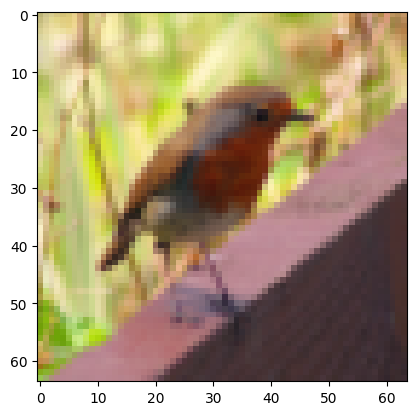

In [5]:
#data type is h5
#.h5" file extension typically indicates that the file is in the Hierarchical Data Format version 5 (HDF5)

train_path ='/content/drive/MyDrive/Colab Notebooks/data/DL Specialization/train_catvnoncat.h5'
train_dataset =h5py.File(train_path,"r")
test_path ='/content/drive/MyDrive/Colab Notebooks/data/DL Specialization/test_catvnoncat.h5'
test_dataset =h5py.File(test_path,"r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y = np.array(train_dataset["train_set_y"][:])
test_set_x_orig = np.array(test_dataset["test_set_x"][:])
test_set_y = np.array(test_dataset["test_set_y"][:])

#data type is h5
#.h5" file extension typically indicates that the file is in the Hierarchical Data Format version 5 (HDF5)

train_path ='/content/drive/MyDrive/Colab Notebooks/data/DL Specialization/train_catvnoncat.h5'
train_dataset =h5py.File(train_path,"r")
test_path ='/content/drive/MyDrive/Colab Notebooks/data/DL Specialization/test_catvnoncat.h5'
test_dataset =h5py.File(test_path,"r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y = np.array(train_dataset["train_set_y"][:])
test_set_x_orig = np.array(test_dataset["test_set_x"][:])
test_set_y = np.array(test_dataset["test_set_y"][:])

#shape of trains data set
print("shape of train dataset",train_set_x_orig.shape)
#shape of train labels
print("shape of train labels",train_set_y.shape)
#shape of test_set data
print("shape of test dataset",test_set_x_orig.shape)
print("shape of test labels",test_set_y.shape)
#get all classes of labels
classes = np.array(test_dataset["list_classes"][:])

#rshape habels
train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))
test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))
print("shape of new labels of train data",train_set_y.shape) #it's like turning values of labels from column vector to row vector
print("shape of new labels of test data",test_set_y.shape)  #it's like turning values of labels from column vector to row vector

#get example number 10 of train dataset
index =10
plt.imshow(train_set_x_orig[index])
print(f"y ={test_set_y[0,index]} it's a  " + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "  picture")

#Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px*num_px*3, 1).
train_set_x_flatten =train_set_x_orig.reshape((train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*train_set_x_orig.shape[3]),train_set_x_orig.shape[0])
test_set_x_flatten =test_set_x_orig.reshape((test_set_x_orig.shape[1]*test_set_x_orig.shape[2]*test_set_x_orig.shape[3]),test_set_x_orig.shape[0])
print("\n\nShapes after flatten")
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

#One common preprocessing step in matching learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array.
# But for picture datasets, it is simpler and more convenient and works almost as well to just "we don't need to do it with this dataset"
#it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

#this final results of preprocessing
train_set_x =train_set_x_flatten/255.
test_set_x =test_set_x_flatten/255.



value of w [[0.]
 [0.]]
value of b 0
dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553
Cost after iteration 0: 5.801545
Cost after iteration 100: 1.055933
Cost after iteration 200: 0.378303
Cost after iteration 300: 0.363595
Cost after iteration 400: 0.356242
Cost after iteration 500: 0.349210
Cost after iteration 600: 0.342420
Cost after iteration 700: 0.335860
Cost after iteration 800: 0.329517
Cost after iteration 900: 0.323380

Optimize Results
w = [[-0.64226437]
 [-0.43498153]]
b = 2.2025594747904087
dw = [[ 0.06282959]
 [-0.01416124]]
db = -0.04847508604218078
len of cost function 10

values of predict function
predictions = [[1. 1. 0.]]


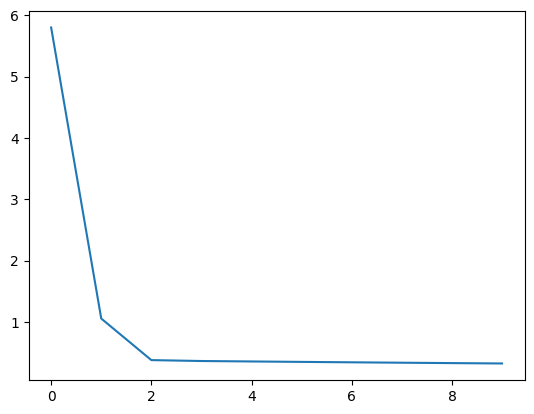

In [6]:
#design algorithm logistic
# each image consist of 12287 pixel, we pass eah image on neurla network of one layer, with one neuron to get final prediction

#start by some helper function
#sigmoid
def sigmoid(x):
  z =1/(1+np.exp(-x))
  return z

#Initializing parameters, You have to initialize w as a vector of zeros
def initialize_with_zeros(dim):
  w =np.zeros((dim,1))
  b = 0 # this one is supposed to be vector (12278,1) , but braodcasting will happen  so no need to make it as avector
  return w,b # w is on shape of volumn vector so later we will have to reshape to row vector using .T

#chek  this function of initializing values
dim = 2
w,b = initialize_with_zeros(dim)
print("value of w",w)
print('value of b',b)

# note : this propagate function based on architecture on lab"check images"
def propagate(w,b,x,y):
  m =x.shape[1]
  A =sigmoid(np.dot(w.T,x)+b)
  cost = np.sum(((- np.log(A))*y + (-np.log(1-A))*(1-y)))/m
  dj_dw = (np.dot(x,(A-y).T))/m
  dj_db =np.sum(A-y)/m
  grads ={"dw":dj_dw,
          "db":dj_db}
  return grads,cost

#let's check this function
w, b,x, y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, x, y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))



#You have initialized your parameters.
#You are also able to compute a cost function and its gradient.
#Now, you want to update the parameters using gradient descent.

def optimize(w,b,x,y,num_iterations,learning_rate,print_cost=False):
  m=x.shape[1]
  costs=[] # to save cost value each iteration
  for i in range(num_iterations):
    grads,cost =propagate(w,b,x,y)
    dw =grads['dw']
    db =grads['db']
    w =w - (learning_rate*dw)
    b =b - (learning_rate*db)
    if i % 100 == 0:
      costs.append(cost)

        # Print the cost every 100 training iterations
    if print_cost and i % 100 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))
  params ={"w":w,
           "b":b}
  grads ={"dw":dw,"db":db}
  return params,grads,costs # theses params values and grads are last values

#check this function
#note : here we didn't initialize values of x, we used values of w,b we set befor
params,grads,costs =optimize(w,b,x,y,num_iterations=1000,learning_rate =0.009,print_cost=True)

print("\nOptimize Results")
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

#plot cost function
print("len of cost function",len(costs))
plt.plot(costs)

# The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X
# to implement prdict function we will implement two steps
# 1 calculate a =sig(w.TX+b)
# 2 convert values to zero and one
def predict(w,b,x):
  m =x.shape[1]
  y_prediction = np.zeros((1,m))
  w =w.reshape(x.shape[0],1)
  A =sigmoid(np.dot(w.T,x)+b)
  for i in range(A.shape[1]):
    y_prediction[0,i] =1 if A[0,i] >=0.5 else 0
  return y_prediction

#let's check function of predict
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print("\nvalues of predict function")
print ("predictions = " + str(predict(w, b, X)))


Cost after iteration 0: 0.693147
Cost after iteration 100: 0.709726
Cost after iteration 200: 0.657712
Cost after iteration 300: 0.614611
Cost after iteration 400: 0.578001
Cost after iteration 500: 0.546372
Cost after iteration 600: 0.518331
Cost after iteration 700: 0.492852
Cost after iteration 800: 0.469259
Cost after iteration 900: 0.447139
Cost after iteration 1000: 0.426262
Cost after iteration 1100: 0.406617
Cost after iteration 1200: 0.388723
Cost after iteration 1300: 0.374678
Cost after iteration 1400: 0.365826
Cost after iteration 1500: 0.358532
Cost after iteration 1600: 0.351612
Cost after iteration 1700: 0.345012
Cost after iteration 1800: 0.338704
Cost after iteration 1900: 0.332664
train accuracy: 91.38755980861244 %
test accuracy: 34.0 %


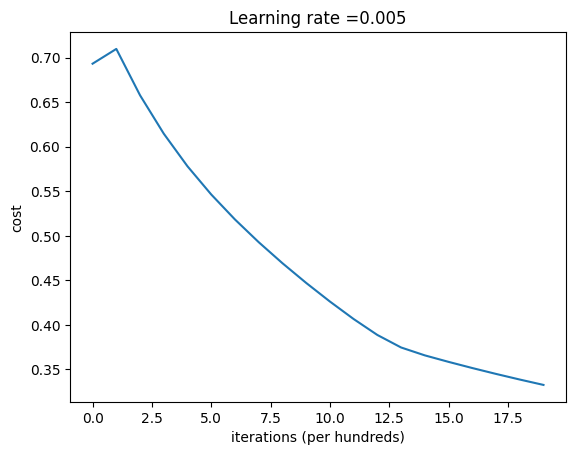

learning rate is: 0.01
Cost after iteration 0: 0.693147
Cost after iteration 100: 2.321789
Cost after iteration 200: 2.830947
Cost after iteration 300: 1.022904
Cost after iteration 400: 1.480529
Cost after iteration 500: 1.909390
Cost after iteration 600: 2.028455
Cost after iteration 700: 1.618240
Cost after iteration 800: 1.294605
Cost after iteration 900: 1.200054
Cost after iteration 1000: 1.127053
Cost after iteration 1100: 1.065931
Cost after iteration 1200: 1.011810
Cost after iteration 1300: 0.962241
Cost after iteration 1400: 0.915954
train accuracy: 71.29186602870814 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.001
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.605784
Cost after iteration 200: 0.589938
Cost after iteration 300: 0.577890
Cost after iteration 400: 0.567791
Cost after iteration 500: 0.559013
Cost after iteration 600: 0.551207
Cost after iteration 700: 0.544146
Cost after iteration 800: 0.537

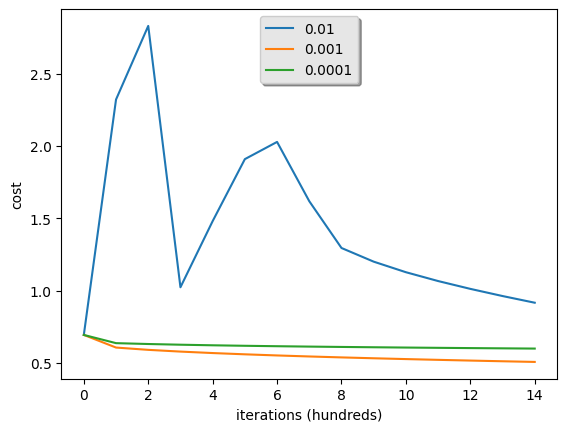

In [7]:

#Merge all functions into a model
def model(x_train,y_train,x_test,y_test,num_iterations=2000,learning_rate=0.5,print_cost=False):
  #initialie values of w,b with zeros
  w,b =initialize_with_zeros(x_train.shape[0])

  #note : here propagate function is implemented on optimize values
  parameters,grads,costs =optimize(w,b,x_train,y_train,num_iterations ,learning_rate,print_cost=True)
  w = parameters["w"]
  b = parameters["b"]

  y_prediction_test  = predict(w, b, x_test)
  y_prediction_train = predict(w, b, x_train)
  print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
  d = {"costs": costs,
         "Y_prediction_test": y_prediction_test,
         "Y_prediction_train" : y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

  return d

#let's check this function
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = False)

# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()


#try different values of learning rates
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

#try this alogorithm with one image

the shape of x is (2, 400)
the shape of y is (1, 400)
i have m = 400 training examples!


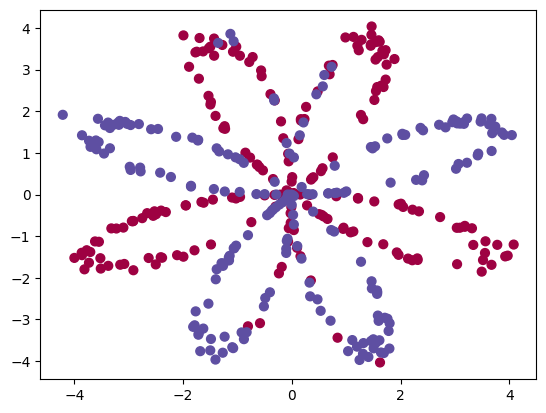

In [8]:
#week 3
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
np.random.seed(1)

#create dataset
m = 400 #number of examples
N = int(m/2) #number of points per class
D = 2 #dimensionality
X =np.zeros((m,D))
Y =np.zeros((m,1),dtype ='uint8')
a = 4
for j in range(2):
  ix =range(N*j,N*(j+1))
  t  =np.linspace(j*3.12,(j+1)*3.12,N)+np.random.randn(N)*0.2
  r  =a*np.sin(4*t)+np.random.randn(N)*0.2
  X[ix]=np.c_[r*np.sin(t), r*np.cos(t)]
  Y[ix]=j
x=X.T
y=Y.T

#let's visualize our data that we can understand it
plt.scatter(x[0,:],x[1,:],c=y,s=40,cmap =plt.cm.Spectral);
#The data looks like a "flower" with some red (label y=0) and some blue (y=1) points
#Your goal is to build a model to fit this data. In other words, we want the classifier to define regions as either red or blue.
#a numpy-array (matrix) X that contains your features (x1, x2) - a numpy-array (vector) Y that contains your labels (red:0, blue:1).

shape_x =x.shape
shape_y =y.shape
m = (x.size)/shape_x[0]
print("the shape of x is "+str(shape_x))
print("the shape of y is "+str(shape_y))
print("i have m = %d training examples!" % (m))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-9-a22d4596fab4>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy of logistic regression: %d ' % float((np.dot(y,LR_Predictions) + np.dot(1-y,1-LR_Predictions))/float(y.size)*100) +


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


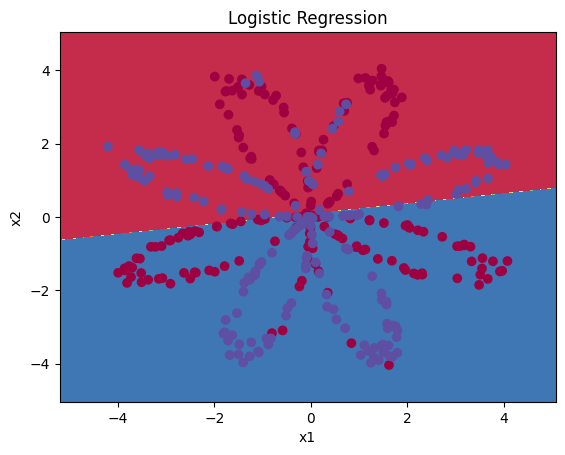

In [9]:
#logistic regression with sklearn built in functions
clf =sklearn.linear_model.LogisticRegressionCV()
clf.fit(x.T,y.T)

#let's plot function to plot decision boudaries
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x),x, y)
plt.title("Logistic Regression")

#compute accuracy using built in funtion
LR_Predictions =clf.predict(x.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(y,LR_Predictions) + np.dot(1-y,1-LR_Predictions))/float(y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Cost after iteration 0: 277.245007
Cost after iteration 1000: 113.031243
Cost after iteration 2000: 107.910860
Cost after iteration 3000: 104.927225
Cost after iteration 4000: 96.491055
Cost after iteration 5000: 90.409227
Cost after iteration 6000: 88.648384
Cost after iteration 7000: 87.562887
Cost after iteration 8000: 86.753958
Cost after iteration 9000: 86.103891

prediction values
Accuracy: 90%


<ipython-input-10-ccc0aba62acb>:134: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100) + '%')
<ipython-input-10-ccc0aba62acb>:144: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100)


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 90.5 %
Accuracy for 20 hidden units: 91.25 %
Accuracy for 50 hidden units: 91.0 %


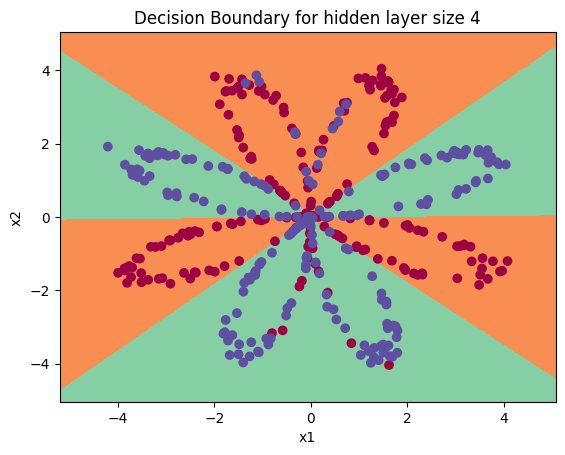

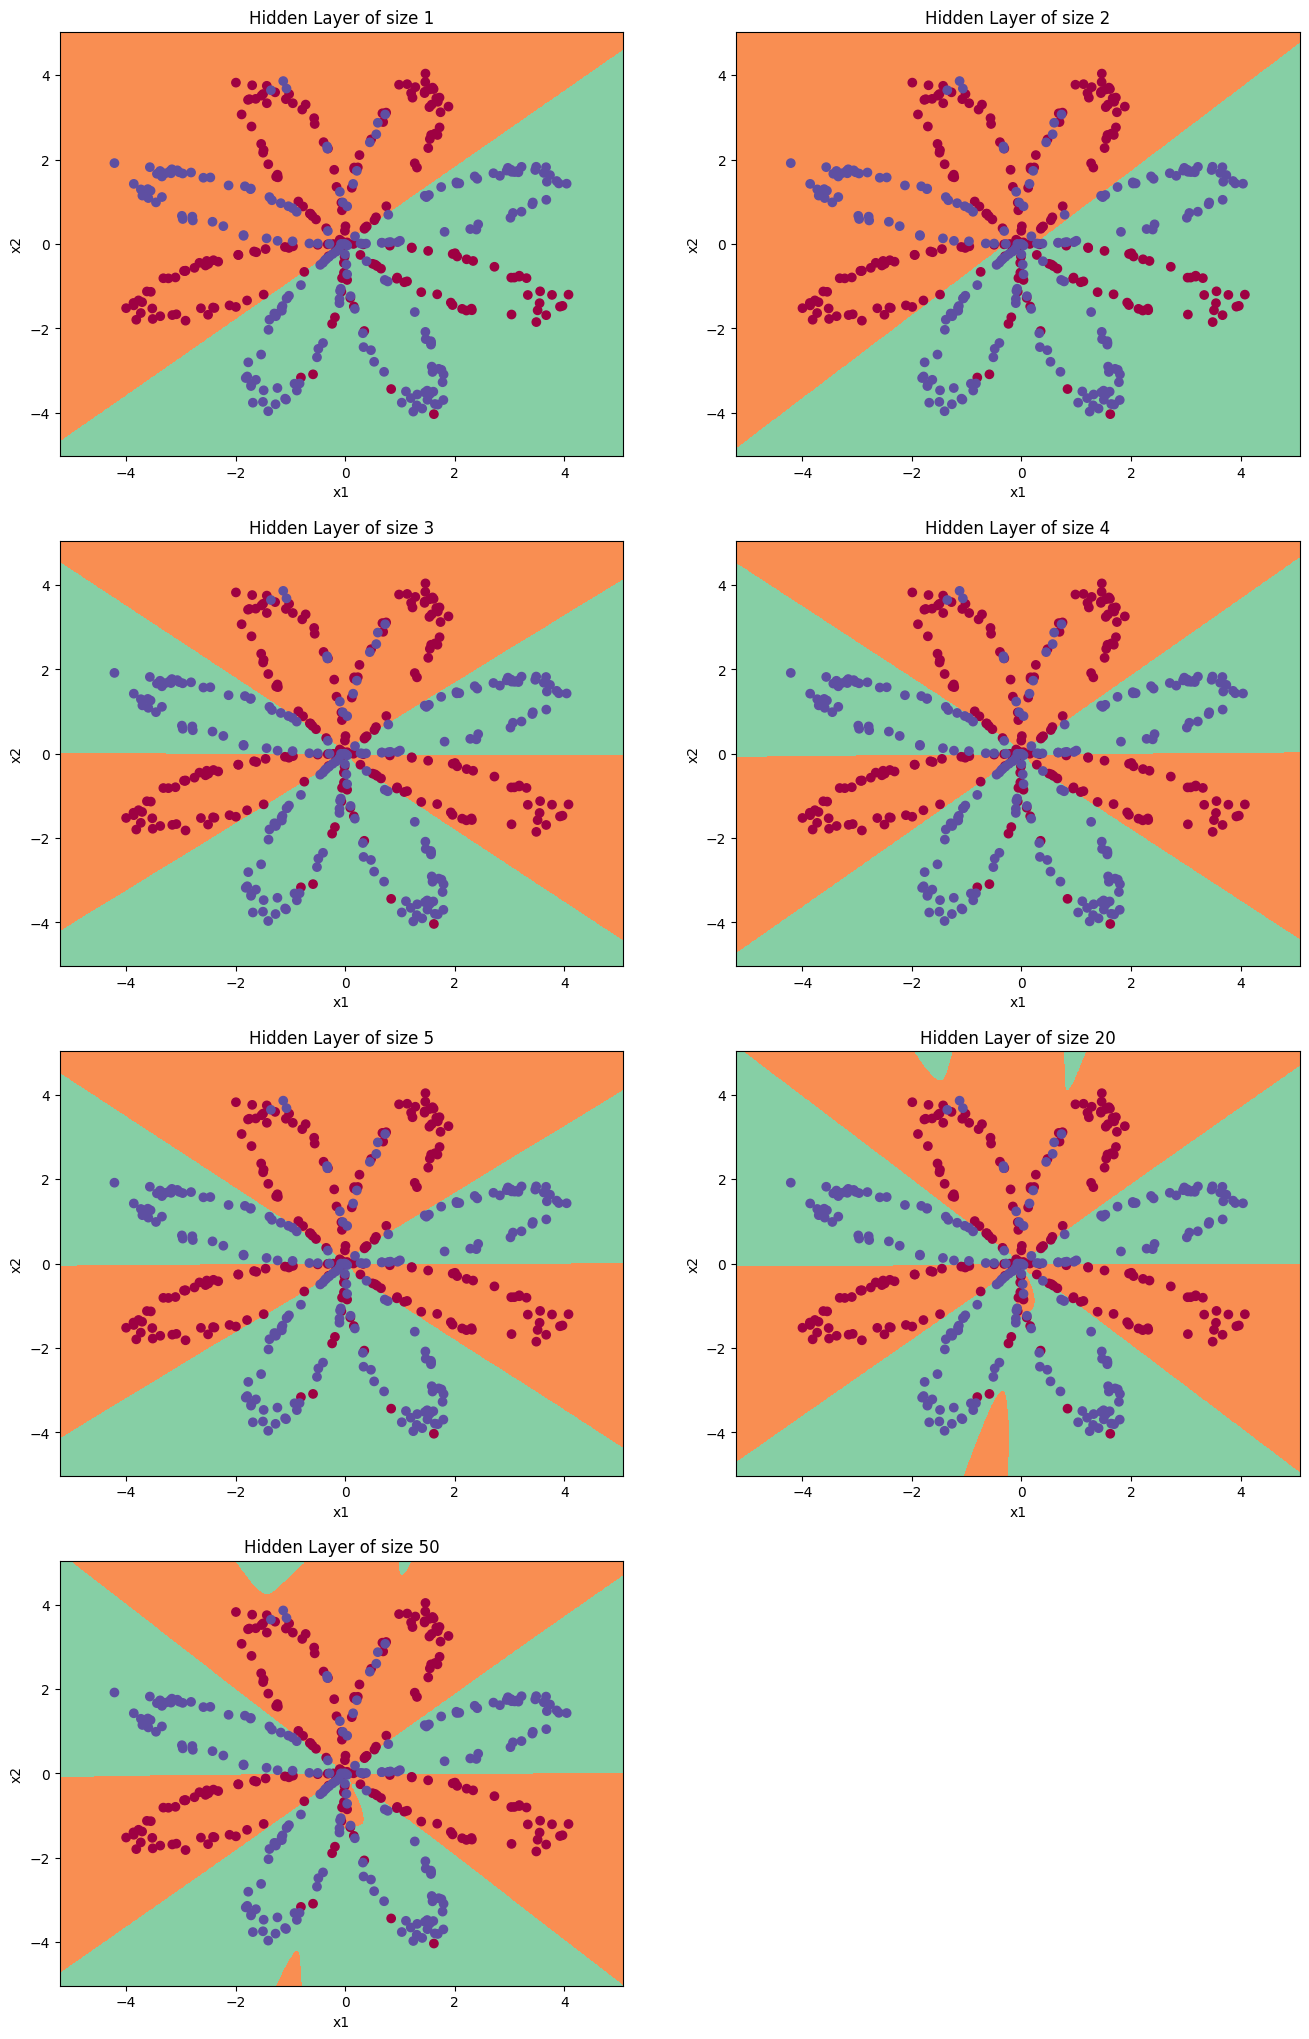

In [10]:
#Neural Network model
#The general methodology to build a Neural Network is to:
#1. Define the neural network structure ( # of input units, # of hidden units, etc).
#2. Initialize the model's parameters
#3. Loop: - Implement forward propagation - Compute loss - Implement backward propagation to get the gradients - Update parameters (gradient descent)

#Defining the neural network structure
#Define three variables: - n_x: the size of the input layer - n_h: the size of the hidden layer (set this to 4) - n_y: the size of the output layer
def layer_sizes(x, y):
  n_x =x.shape[0]
  n_h = 4
  n_y = y.shape[0]
  return(n_x,n_h,n_y)

#Initialize the model's parameters
def initialize_parameters(n_x, n_h, n_y):
  w1 = np.random.randn(n_h,n_x) * 0.01
  b1 = np.zeros((n_h,1))
  w2 = np.random.randn(n_y,n_h) * 0.01
  b2 = np.zeros((n_y,1))
  parameters = {"w1": w1,
                  "b1": b1,
                  "w2": w2,
                  "b2": b2}
  return parameters

#step 3 : The Loop
# Implement forward_propagation()
def forward_propagation(x, parameters):
  w1 = parameters["w1"]
  b1 = parameters["b1"]
  w2 = parameters["w2"]
  b2 = parameters["b2"]

  Z1 = np.dot(w1,x) + b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(w2,A1) + b2
  A2 = sigmoid(Z2)
  cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
  return A2, cache #cache is dictionary has no shape attribute, A2 is array with shape (1,400)

# Implement compute_cost() to compute the value of the cost
def compute_cost(A2, y, parameters):
  m = Y.shape[1] # number of example
  logprobs = np.multiply(y ,np.log(A2)) + np.multiply((1-y), np.log(1-A2))
  cost = (-1/m) * np.sum(logprobs)
  return cost

# Implement the function backward_propagation().
def backward_propagation(parameters, cache, x, y):
  m = x.shape[1]
  w1 = parameters["w1"]
  b1 = parameters["b1"]
  w2 = parameters["w2"]
  b2 = parameters["b2"]

  A1 = cache["A1"]
  A2 = cache["A2"]
  Z1 = cache["Z1"]
  Z2 = cache["Z2"]

  dZ2 = A2 - y
  dw2 = (1/m) * np.dot(dZ2,A1.T)
  db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
  dZ1 = np.dot(w2.T,dZ2) * (1 - np.power(A1,2))
  dw1 = (1/m) *(np.dot(dZ1,x.T))
  db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
  grads = {  "dw1": dw1,
             "db1": db1,
             "dw2": dw2,
             "db2": db2}
  return grads


def update_parameters(parameters, grads, learning_rate):
  w1 = parameters["w1"]
  b1 = parameters["b1"]
  w2 = parameters["w2"]
  b2 = parameters["b2"]

  dw1 = grads["dw1"]
  db1 = grads["db1"]
  dw2 = grads["dw2"]
  db2 = grads["db2"]

  w1 = w1 - learning_rate * dw1
  b1 = b1 - learning_rate * db1
  w2 = w2 - learning_rate * dw2
  b2 = b2 - learning_rate * db2
  parameters = {"w1": w1,
                  "b1": b1,
                  "w2": w2,
                  "b2": b2}
  return parameters

#integrate all operations into one function to implement n_n model
def nn_model(x,y,n_h,learning_rate,num_iterations=1000,print_cost=False):
  n_x = layer_sizes(x, y)[0]
  n_y = layer_sizes(x, y)[2]
  parameters = initialize_parameters(n_x, n_h, n_y)
  w1 = parameters["w1"]
  b1 = parameters["b1"]
  w2 = parameters["w2"]
  b2 = parameters["b2"]
  for i in range(0, num_iterations):
    A2, cache = forward_propagation(x, parameters)
    cost = compute_cost(A2, y, parameters)
    grads = backward_propagation(parameters, cache, x, y)
    parameters = update_parameters(parameters, grads, learning_rate)
    if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
  return parameters

#let's check nn_model function
#parameters = nn_model(x, y, 4,0.2,num_iterations=10000, print_cost=True)

#create prediction function
def predict(parameters,x):
  A2,cache=forward_propagation(x,parameters)
  predictions =(A2>0.5)
  return predictions

parameters = nn_model(x, y, 4, 1.2 , num_iterations = 10000, print_cost=True)

#build plot boundaries function
plot_decision_boundary(lambda x: predict(parameters, x.T), x, y)
plt.title("Decision Boundary for hidden layer size " + str(4))
#printprediction values
print("\nprediction values")
predictions = predict(parameters, x)
print ('Accuracy: %d' % float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100) + '%')
#tuninig hidden layer
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(x, y, n_h,1.2, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), x, y)
    predictions = predict(parameters, x)
    accuracy = float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

#check it on another datset


In [11]:
#week 4
#You have previously trained a 2-layer Neural Network (with a single hidden layer'this hidden layer didn't have an activation function, so it's like having linear activation function). This week, you will build a deep neural network, with as many layers as you want!
import numpy as np
import h5py
import matplotlib.pyplot as plt
np.random.seed(1)

# Initialization
#You will write two helper functions that will initialize the parameters for your model
#The first function will be used to initialize parameters for a two layer model
#The second one will generalize this initialization process to L layers.

#Create and initialize the parameters of the 2-layer neural network.
def initialize_parameters(n_x,n_h,n_y):
  w1=np.random.randn(n_h,n_x)*0.01
  b1=np.zeros((n_h,1))
  w2=np.random.randn(n_y,n_h)*0.01
  b2=np.zeros((n_y,1))
  parameters={"w1":w1,
              "w2":w2,
              "b1":b1,
              "b2":b2
             }
  return parameters
#check intialize parameters for two layers functions
parameters=initialize_parameters(3,2,1)
print("w1=",str(parameters["w1"]))
print("w2=",str(parameters["w2"]))
print("b1=",str(parameters["b1"]))
print("b2=",str(parameters["b2"]))


#Create and initialize the parameters of the L-layer neural network.
#model has relu function on all hidden layers followed by sigmoid activation function on output layer
def initialize_parameters_deep(layer_dims):
  #layer dims list of dimesnsion of each layer
  #id dims layer[3,2,4], first input layer with 3 features
  # first hiden lyer with 2 neurons, last output layer with 4 neurons
  np.random.seed(3)
  parameters={} #to save parameteres
  L=len(layer_dims) #number of layers in network
  for l in range(1,L):
    parameters['w'+str(l)]= np.random.randn(layer_dims[l],layer_dims[l-1]) * 0.01
    parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
  return parameters
#check intialize parameters for L layers functions
parameters = initialize_parameters_deep([5,4,3])
print("\ndeep learning layers")
print("w1 = " + str(parameters["w1"]))
print("b1 = " + str(parameters["b1"]))
print("w2 = " + str(parameters["w2"]))
print("b2 = " + str(parameters["b2"]))



#Forward propagation module
# You will start by implementing some basic functions that you will use later when implementing the model
#1-LINEAR :this one will implement z=w.A+b,where A[0] is x
#2-linear_activation :takes output of first one and apply activation on it eaither sigmoid or relu
#3-linear acitvation function: this one implement function 2 L-1 times with relu activation, then aply it with sigmoid on L layer"last layer""

#function_1
def linear_forward(A,w,b):
  z =np.dot(w,A)+b
  cache=(A,w,b)
  return z,cache

#funtion 2, you will need two helper functions sigmoid,relu
def sigmoid(z):
  A=1/(1+np.exp(-z))
  cache=z
  return A,cache

def relu(z):
  A =np.maximum(0,z)
  cache=z
  return A,cache

def linear_activation_forward(A_prev,w,b,activation):
  if activation=="sigmoid":
    z,linear_cache=linear_forward(A_prev,w,b)
    A,activation_cache=sigmoid(z)
  elif activation=="relu":
    z,linear_cache=linear_forward(A_prev,w,b)
    A,activation_cache=relu(z)

  cache =(linear_cache,activation_cache)
  return A,cache

#function 3
def L_model_forward(x,parameters):
  #parameters -- output of initialize_parameters_deep()
  caches=[]
  A=x
  L=len(parameters)//2
  for l in range(1,L):
    A_prev =A
    A,cache =linear_activation_forward(A_prev,parameters['w'+str(l)],parameters['b'+str(l)],'relu')
    caches.append(cache)

  AL,cache =linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid")
  caches.append(cache)
  return AL,caches

#Now you will implement forward and backward propagation. You need to compute the cost, because you want to check if your model is actually learning.
def compute_cost(AL,y):
  m=y.shape[1]
  cost=(-1/m)*(np.dot(y,np.log(AL).T)+np.dot(1-y),np.log(1-AL).T)
  cost=np.squeeze(cost)
  return cost


#Backward propagation module
# you will implement helper functions for backpropagation
#you are going to build the backward propagation in three steps:
#1-LINEAR backward,sppose you caulated dz[l] you want to get dw[l],db[l],da[l-1]
#2-Linear-Activation backward,there is two backword activations sigmoid backward and relu backward,
#backward activation gets dz[l] givening da and activation cache
#3- full model backward,Recall that when you implemented the L_model_forward function, at each iteration, you stored a cache which contains (X,W,b, and z). In the back propagation module,
#you will use those variables to compute the gradients


#function 1
def linear_backward(dZ, cache):
  A_prev, w, b = cache
  m = A_prev.shape[1]
  w = (1/m) * np.dot(dZ, A_prev.T)
  db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
  dA_prev = np.dot(w.T,dZ)
  return dA_prev, dw, db


# function 2, we need some helper function
def sigmoid_backward(dA, cache):
  Z = cache
  s = 1/(1+np.exp(-Z))
  dZ = dA * s * (1-s)
  return dZ

def relu_backward(dA, cache):
  Z = cache
  dZ = np.array(dA, copy=True)
  dZ[Z <= 0] = 0
  return dZ


def linear_activation_backward(dA, cache, activation):
  linear_cache, activation_cache = cache
  if activation =="relu":
    dZ = relu_backward(dA, activation_cache)
  elif activation =="sigmoid":
    dZ = sigmoid_backward(dA, activation_cache)
  dA_prev, dW, db = linear_backward(dZ, linear_cache)
  return dA_prev, dW, db

#function 3
def L_model_backward(AL, y, caches):
  grads = {}
  L = len(caches) # the number of layers
  m = AL.shape[1]
  y = y.reshape(AL.shape) # after this line, Y is the same shape as AL
  dAL = - (np.divide(y, AL) - np.divide(1 - y, 1 - AL))
  current_cache = caches[L-1] # Last Layer
  grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
  for l in reversed(range(L-1)):
    current_cache = caches[l]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
    grads["dA" + str(l)] = dA_prev_temp
    grads["dW" + str(l + 1)] = dW_temp
    grads["db" + str(l + 1)] = db_temp

#Update Parameters : update the parameters of the model, using gradient descent:
def update_parameters(parameters, grads, learning_rate):
  L = len(parameters) // 2
  for l in range(L):
    parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
    parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
  return parameters




w1= [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
w2= [[ 0.01744812 -0.00761207]]
b1= [[0.]
 [0.]]
b2= [[0.]]

deep learning layers
w1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
w2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


y = 1It's acat picture.
train_x shape(12288, 209)
test_x shape(12288, 50)


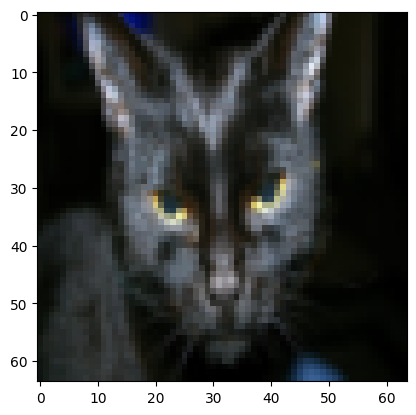

In [34]:
#week 4 last assignment
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
np.random.seed(1)
#You will use the same "Cat vs non-Cat" dataset as in "Logistic Regression as a Neural Network"
#You are given a dataset ("data.h5") containing: - a training set of m_train images labelled as cat (1)or non-cat (0)
#a test set of m_test images labelled as cat and non-cat - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

train_dataset=h5py.File("/content/drive/MyDrive/Colab Notebooks/data/DL Specialization/train_catvnoncat.h5","r")
test_dataset =h5py.File("/content/drive/MyDrive/Colab Notebooks/data/DL Specialization/test_catvnoncat.h5","r")
train_set_x_orig=np.array(train_dataset["train_set_x"][:]) #shape(209,64,64,3)
train_set_y_orig=np.array(train_dataset["train_set_y"][:]) #shape (209,)

test_set_x_orig =np.array(test_dataset["test_set_x"][:]) #shape(209,64,64,3)
test_set_y_orig =np.array(test_dataset["test_set_y"][:])# shape(50,)
classes =np.array(test_dataset["list_classes"][:])
#reshape y labels
train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0])) #new shape(1,209)
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0])) #new shape(1,50)

#rename datasets
train_x_orig =train_set_x_orig
test_x_orig =test_set_x_orig
train_y= train_set_y_orig
test_y =test_set_x_orig
#let's show some images
index =25
plt.imshow(train_x_orig[index])
print("y = "+str(train_y[0,index])+"It's a"+classes[train_y[0,index]].decode("utf-8") +  " picture.")

# reshape the training and test examples
train_x_flatten =train_x_orig.reshape(train_x_orig.shape[0],-1).T #new shape (12288, 209)
test_x_flatten=test_x_orig.reshape(test_x_orig.shape[0],-1).T #new shape (12288, 50)
#Standardize data to have feature values between 0 and 1.
train_x =train_x_flatten/255
test_x =test_x_flatten/255

print("train_x shape"+str(train_x.shape))
print("test_x shape"+str(test_x.shape))

#You will build two different models:
#1 A 2-layer neural network
#2 An L-layer deep neural network

#check notes on slides



In [33]:
train_x_flatten.shape

(12288, 209)

In [32]:

train_set_x_orig.shape

(209, 64, 64, 3)